### Logistic Regression For Multiclass Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [13]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


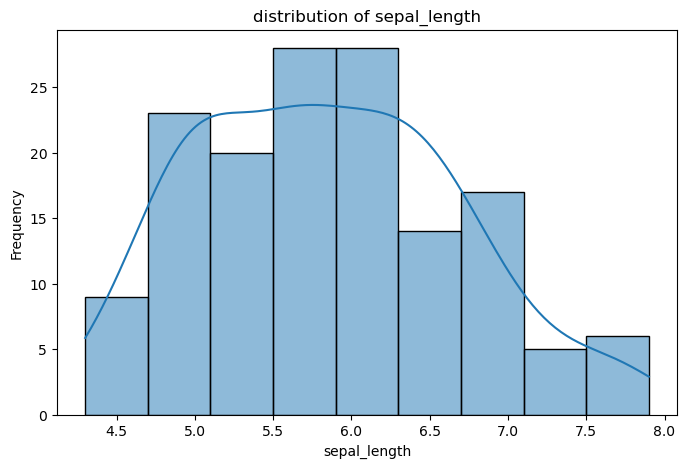

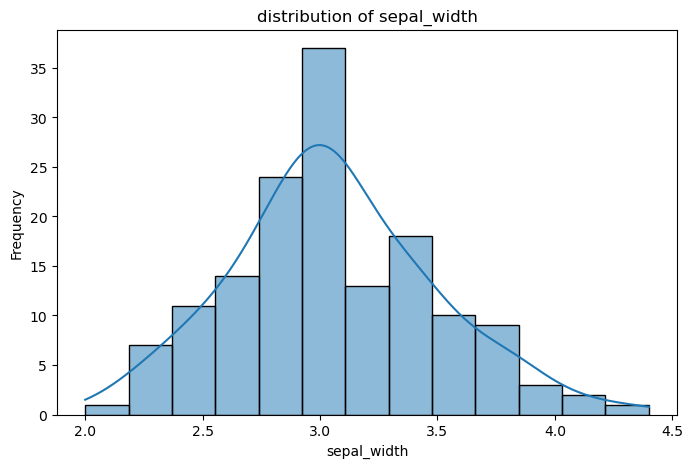

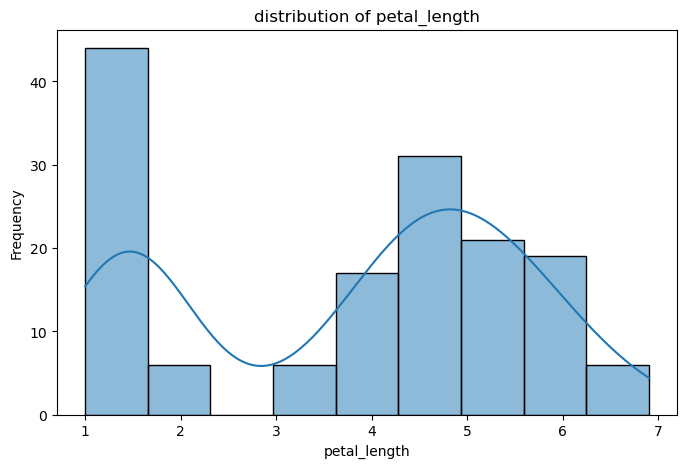

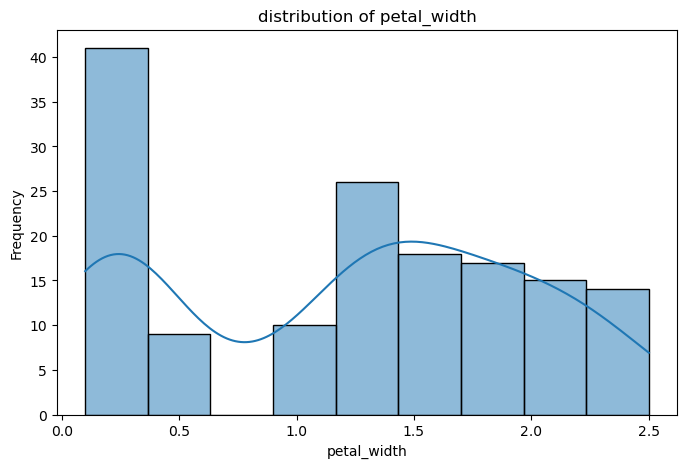

In [45]:
l=['sepal_length','sepal_width','petal_length','petal_width']
for col in l:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col],kde=True)
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Checling for outliers


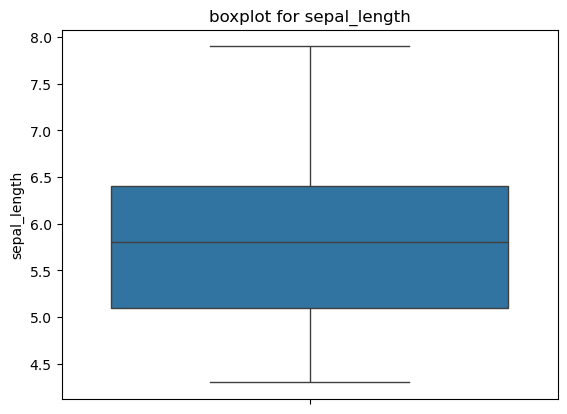

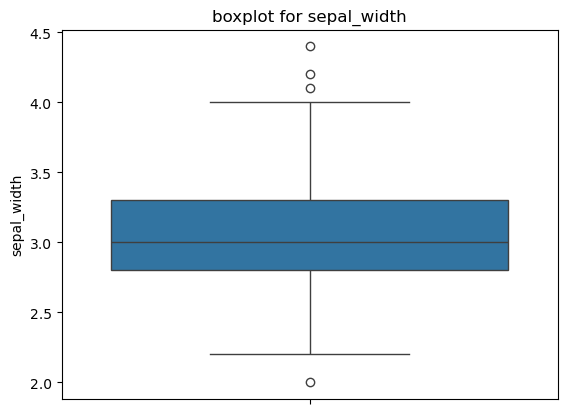

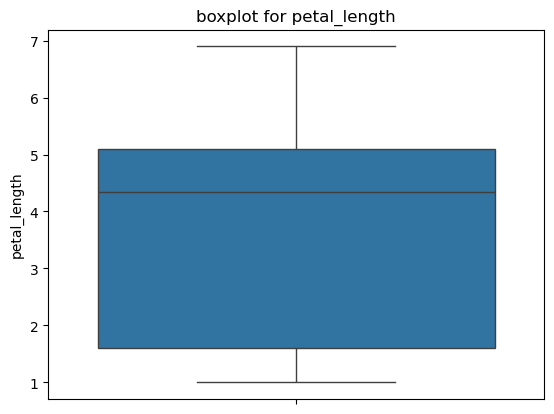

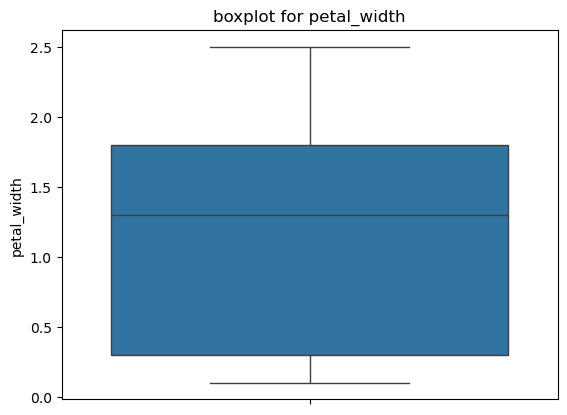

In [35]:
print('Checling for outliers')
for col in ('sepal_length','sepal_width','petal_length','petal_width'):
    sns.boxplot(df[col])
    plt.title(f'boxplot for {col}')
    plt.show()

There are 4 outliers in sepal width

Relationship between feature and target


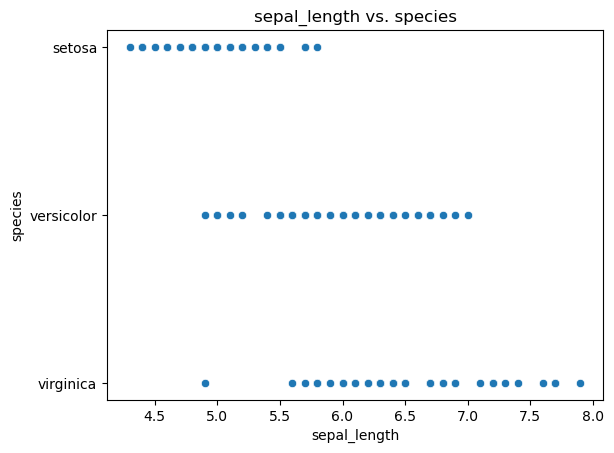

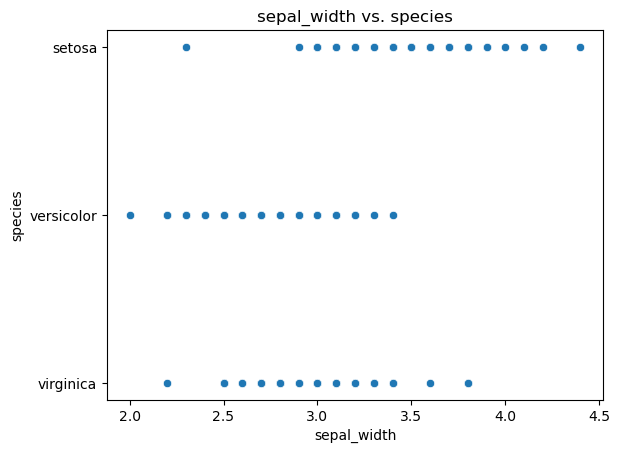

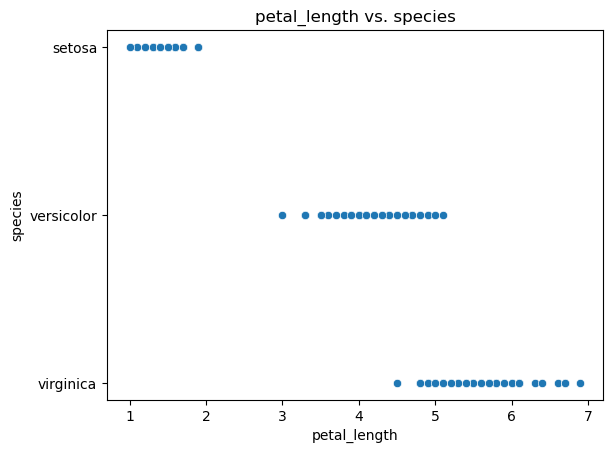

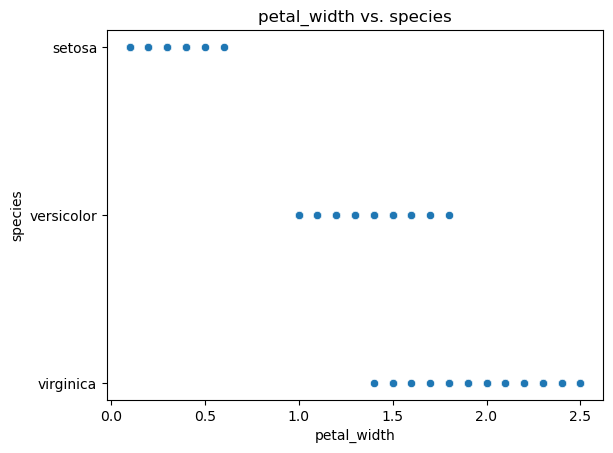

In [43]:
print('Relationship between feature and target')
for col in ('sepal_length','sepal_width','petal_length','petal_width'):
    sns.scatterplot(x=df[col],y=df['species'])
    plt.title(f'{col} vs. species' )
    plt.xlabel(col)
    plt.ylabel('species')
    plt.show()


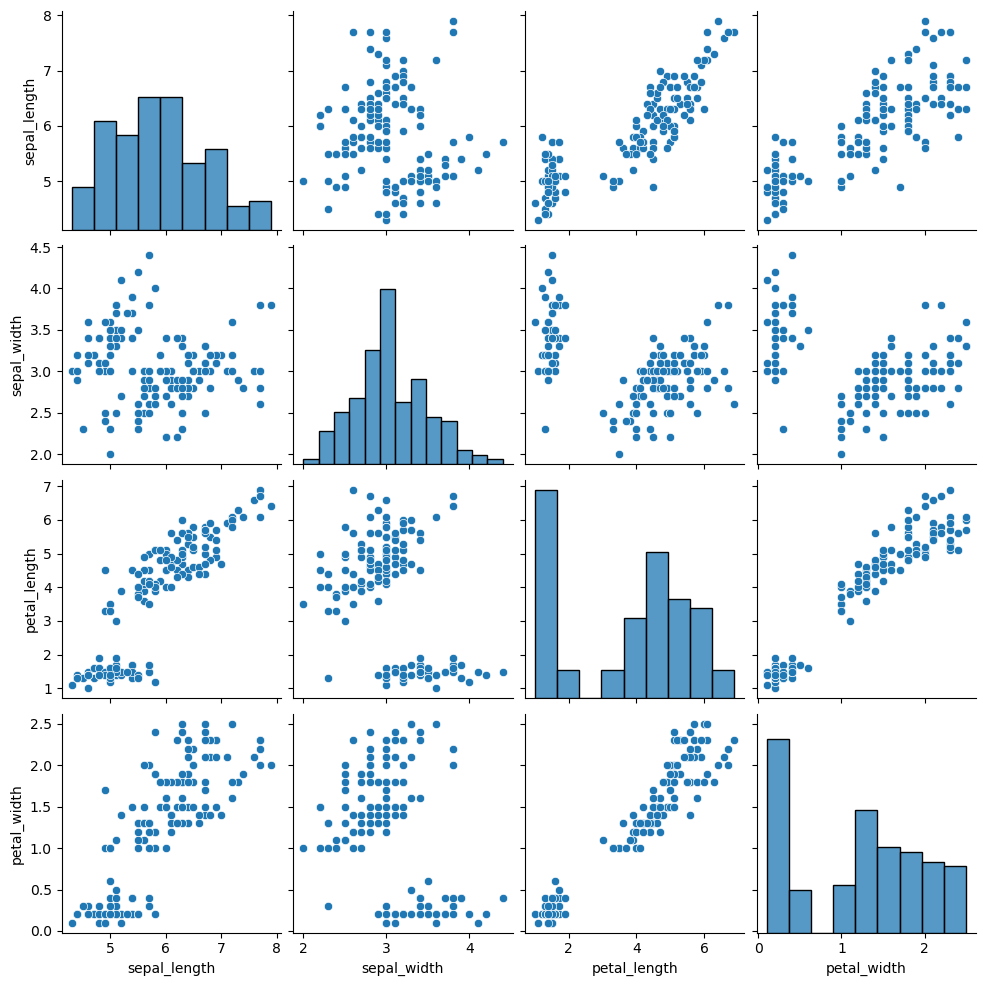

In [46]:
sns.pairplot(df)
plt.show()

In [50]:
df.loc[df['sepal_length']==0]

,sepal_length,sepal_width,petal_length,petal_width,species


In [51]:
x=df.iloc[:,:-1]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
y=df.species

In [53]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [58]:
y_test

38         setosa
66     versicolor
115     virginica
117     virginica
89     versicolor
136     virginica
68     versicolor
94     versicolor
84     versicolor
28         setosa
90     versicolor
11         setosa
40         setosa
126     virginica
79     versicolor
144     virginica
123     virginica
124     virginica
76     versicolor
59     versicolor
132     virginica
105     virginica
53     versicolor
17         setosa
64     versicolor
18         setosa
13         setosa
116     virginica
9          setosa
81     versicolor
Name: species, dtype: object

In [65]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)


LogisticRegression()

In [66]:
y_predict=LR.predict(x_test)

In [67]:
y_predict

array(['setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor'],
      dtype=object)

In [70]:
y_predict_prob = LR.predict_proba(x_test)
1-y_predict_prob

array([[0.01599964, 0.98400042, 0.99999994],
       [0.98794389, 0.26545403, 0.74660208],
       [0.99989243, 0.92929291, 0.07081467],
       [0.99999968, 0.99307513, 0.00692519],
       [0.9730564 , 0.08650513, 0.94043848],
       [0.99997288, 0.97557013, 0.02445699],
       [0.99734061, 0.22385136, 0.77880803],
       [0.98008964, 0.10730942, 0.91260094],
       [0.98600479, 0.29824273, 0.71575247],
       [0.02615784, 0.97384222, 0.99999994],
       [0.98759237, 0.1395276 , 0.87288002],
       [0.02714311, 0.97285704, 0.99999985],
       [0.01580212, 0.98419792, 0.99999996],
       [0.99835383, 0.54062451, 0.46102165],
       [0.92288136, 0.08260278, 0.99451586],
       [0.99998999, 0.98104947, 0.01896054],
       [0.99906662, 0.59800154, 0.40293184],
       [0.99997022, 0.94726232, 0.05276746],
       [0.99829587, 0.20230531, 0.79939882],
       [0.94593651, 0.12086699, 0.93319651],
       [0.99998219, 0.96427819, 0.03573962],
       [0.9999998 , 0.99177424, 0.00822596],
       [0.

In [71]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [74]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [76]:
recall=recall_score(y_test,y_predict,average='weighted')
recall

1.0

In [77]:
precision=precision_score(y_test,y_predict,average='weighted')
precision

1.0

In [78]:
f1score=f1_score(y_test,y_predict,average='weighted')
f1score

1.0

In [79]:
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

